#  Método Bootstrap: Estimación de la incertidumbre mediante remuestreo

El método **Bootstrap** es una técnica de **re-muestreo estadístico** que permite estimar la **variabilidad** de un estimador (como la media, mediana, correlación, coeficiente de regresión, etc.) sin asumir una distribución teórica.

Su idea central es **simular el proceso de muestreo** a partir de la muestra disponible, generando muchas “réplicas” del experimento original para analizar cómo cambia el estadístico de interés.


##  ¿Por qué necesitamos el Bootstrap?

En la práctica, muchas veces:

- Solo tenemos **una muestra pequeña**.
- **Desconocemos la distribución** de la población.
- No podemos derivar **fórmulas analíticas** para el error estándar o los intervalos de confianza.

El Bootstrap permite obtener **una aproximación empírica** de esa incertidumbre, usando únicamente los datos observados.

 **Ejemplo típico:**  
En un estudio biomédico con solo 15 pacientes, se mide la proteína C reactiva (CRP).  
Queremos saber qué tan confiable es el promedio obtenido, pero no podemos repetir el experimento.  
El Bootstrap nos da esa información.


## Idea fundamental

> El Bootstrap asume que **la muestra observada representa a la población**.

Si la muestra es buena, entonces:
- Re-muestrear *de ella* con reemplazo es como volver a muestrear *de la población*.
- Podemos simular miles de “mundos posibles” sin necesidad de recolectar nuevos datos.

---

###  Conceptualmente:

- Población (desconocida)
↓
- Muestra original (n datos)
↓
- Re-muestreo 1 → estadístico₁
- Re-muestreo 2 → estadístico₂
...
- Re-muestreo B → estadístico_B


Al analizar la distribución de esos estadísticos (por ejemplo, 1000 medias), podemos estimar:

- El **error estándar**
- El **intervalo de confianza**
- La **distribución empírica** del estimador


##  Procedimiento paso a paso del Bootstrap

- 1 **Tener una muestra original** de tamaño `n`:  
   Ejemplo: `[2.1, 2.3, 2.8, 3.1, 3.4, 3.5, 3.7, 3.9, 4.0, 4.1]`

- 2 **Re-muestrear con reemplazo** `n` datos de esa misma muestra.  
   Cada nuevo conjunto puede repetir o excluir valores.

- 3 **Calcular el estadístico** (media, mediana, correlación, coeficiente, etc.)  
   para cada re-muestreo.

- 4 **Repetir el proceso** muchas veces (`B ≈ 1000–10 000`).

- 5 **Analizar la distribución Bootstrap** de ese estadístico:
   - Error estándar = desviación estándar de los valores bootstrap.  
   - Intervalo de confianza = percentiles 2.5% y 97.5%, o versiones corregidas (BCa, t-bootstrap).

 Resultado final: una **distribución empírica del estimador**, que muestra su variabilidad.


##  Supuestos del método Bootstrap

| Supuesto | Descripción |
|-----------|-------------|
| **1. Representatividad** | La muestra original debe reflejar bien la población. Si está sesgada, el Bootstrap reproducirá el sesgo. |
| **2. Independencia** | Las observaciones deben ser independientes. Si hay dependencia (series temporales o clusters), se deben usar variantes (Block o Cluster Bootstrap). |
| **3. Tamaño mínimo** | Idealmente `n > 10–15`. Con menos datos, los remuestreos tienden a ser copias y subestiman la variabilidad. |

---

##  Limitaciones prácticas

- No corrige sesgos sistemáticos de muestreo.
- Puede fallar con datos altamente asimétricos o con muchos outliers.
- Requiere **alto costo computacional** (aunque hoy es manejable).

 **Solución:** existen variantes especializadas (BCa, t-bootstrap, Block, Cluster, Wild, Paramétrico, Bayesian…)


##  Tipos de Bootstrap: ¿qué cambia?

Todos los métodos comparten los **pasos 1–4** (re-muestreo con reemplazo, cálculo del estadístico y obtención de su distribución bootstrap).  
La **diferencia** está en **cómo construimos el intervalo de confianza** o **cómo re-muestreamos** cuando hay dependencias/agrupaciones.

### Dos familias:
1) **Cambian solo el cálculo del intervalo** (mismo re-muestreo i.i.d.):
   - **Percentil**
   - **Bootstrap-t**
   - **BCa (Bias-Corrected & Accelerated)**

2) **Cambian la forma de re-muestrear o qué se re-muestrea**:
   - **Paramétrico** (simula desde un modelo)
   - **Block** (series temporales, dependencia)
   - **Cluster** (datos agrupados por centros/hospitales)
   - **Wild** (regresión con heterocedasticidad; re-muestrea residuos)
   - **Bayesian** (asigna **pesos Dirichlet** a los datos)

En las siguientes celdas explicamos cada uno con ejemplos conceptuales y cuándo usarlo.


##  Percentil Bootstrap

###  Idea
Usar **directamente** los percentiles de la distribución bootstrap del estadístico.
- Si quieres un IC al 95%, tomas los percentiles **2.5% y 97.5%** de los `B` valores.

###  ¿Qué está “pensando”?
"Si yo pudiera repetir el experimento muchas veces, el 95% de mis estimaciones caería entre estos dos valores."  
Como ya simulaste esos “mundos”, basta cortar los extremos.

###  Ventajas
- Sencillo, intuitivo, universal.
- No requiere suposiciones ni fórmulas adicionales.

###  Limitaciones
- Si la **distribución bootstrap es asimétrica o sesgada**, el IC puede quedar descentrado.
- Puede ser optimista en muestras pequeñas.

###  Úsalo cuando…
- Tienes n moderado (≥ 20–30) y la distribución no luce muy sesgada.
- Quieres un punto de partida rápido y didáctico.

###  Cómo reportarlo
“IC bootstrap (percentil) 95% = [L, U], con B = 5000 remuestreos.”


##  Bootstrap-t (o studentized)

###  Idea
No todas las muestras remuestreadas tienen la misma **variabilidad interna**.  
Bootstrap-t **estandariza** cada estimación dividiendo por un **error estándar** calculado en esa misma muestra, generando un “t” empírico.

###  Pasos conceptuales
1. Para cada remuestreo, calcula:
   - el **estadístico** (ej., media)
   - su **SE** (p. ej., sd/√n)
2. Obtén la distribución de:
   $$
   t^* = \frac{\hat{\theta}^* - \hat{\theta}}{SE^*}
   $$
3. Toma los percentiles de esos `t*` y reconstruye el IC:
   $$
   \hat{\theta} \pm t^*_{(percentil)} \times SE(\text{muestra original})
   $$

###  Ventajas
- Ajusta por la **inestabilidad** de cada muestra.
- Suele funcionar mejor que percentil cuando la varianza “baila”.

###  Limitaciones
- Más costoso (debes estimar SE en cada remuestreo).
- No corrige sesgo/asimetría de la distribución del estadístico.

###  Úsalo cuando…
- Tu estadístico tiene **SE bien definido** y observas **variación** marcada del SE entre remuestreos.


##  BCa — Bias-Corrected and Accelerated

###  Idea
Corrige **sesgo** y **asimetría** de la distribución bootstrap del estadístico ajustando los **percentiles** que usas para cortar el intervalo.

- Corrige desplazamientos (si la mayoría de las estimaciones cae a un lado de la original).
- Corrige colas desiguales (asimetría).

###  Intuición
BCa “mira” tu histograma bootstrap:
- Si está **corrido**, desplaza el IC.
- Si tiene **cola más larga a un lado**, estira ese lado del IC.

###  Ventajas
- Suele ser el **más preciso** en práctica con muestras pequeñas o sesgadas.
- Muy utilizado por defecto en software estadístico.

###  Limitaciones
- Conceptualmente más complejo (usa **jackknife** y transformaciones).
- Un poco más lento.

###  Úsalo cuando…
- Tu distribución bootstrap luce **asimétrica**.
- Tu n es **pequeño**.
- Quieres el IC más robusto sin entrar a modelos paramétricos.


##  Bootstrap Paramétrico

###  Idea
En vez de extraer con reemplazo de tus datos, **simulas datos nuevos desde un modelo teórico** (ej. Normal, Poisson, Binomial) **ajustado a la muestra**.

###  Pasos conceptuales
1. Ajusta una distribución a tu muestra (p. ej., Normal con media y sd estimadas).
2. Genera `B` muestras nuevas desde esa distribución.
3. Calcula el estadístico en cada muestra → distribución bootstrap paramétrica.
4. Construye IC (percentil/BCa/lo que el software permita).

###  Ventajas
- Útil con **pocos datos** si el modelo paramétrico es razonable.
- Permite incorporar conocimiento previo (forma de la distribución).

###  Limitaciones
- **Pierde la no-parametricidad**: si el modelo está mal, los IC engañan.
- Dependes de la calidad del ajuste.

###  Úsalo cuando…
- Tienes **suposiciones sólidas** sobre la distribución subyacente.
- Quieres comparar con el bootstrap no paramétrico.


##  Block Bootstrap (datos dependientes)

###  Problema
Si tus datos están **autocorrelacionados** (series fisiológicas, EEG, temperatura), re-muestrear puntos sueltos **rompe la dependencia**.

###  Idea
Re-muestrear **bloques consecutivos** de tamaño fijo (o aleatorio), para preservar la correlación local.

###  Tipos comunes
- **Moving Block Bootstrap (MBB)**: bloques contiguos de tamaño `l`, elegidos con reemplazo.
- **Stationary/Circular**: variantes que suavizan bordes y reducen sesgos.

### Elección del tamaño de bloque
- Bloques **muy pequeños** → se rompe dependencia, subestima varianza.  
- Bloques **muy grandes** → poca variabilidad, IC demasiado anchos.  
- Regla práctica: probar `l` entre 5–20% de la longitud de la serie, o usar métodos de selección data-driven (tema avanzado).

### Cuándo usarlo
- Series temporales (frecuencia cardíaca, temperatura, EEG, glucosa continua).
- Datos espaciales con dependencia local.

### Limitaciones
- Seleccionar `l` es crítico.
- Implementación más compleja que i.i.d.


## Cluster Bootstrap (datos agrupados)

### Problema
Datos por **clusters** (hospitales, escuelas, familias): mediciones dentro del mismo grupo son **dependientes**.

### Idea
Cambiar la **unidad de re-muestreo**: en lugar de individuos, re-muestrear **grupos completos** (clusters) con reemplazo.

### Pasos conceptuales
1. Identificar el factor de agrupación (p. ej., hospital).
2. Re-muestrear `N_clusters` con reemplazo.
3. Tomar **todas** las observaciones de cada cluster seleccionado.
4. Calcular el estadístico → distribución bootstrap por clusters.

### Cuándo usarlo
- Ensayos multicéntricos (hospitales).
- Salones/escuelas en estudios educativos.
- Familias en estudios genéticos.

### Limitaciones
- Puede requerir muchos clusters para una buena precisión.
- Si los clusters son muy desbalanceados, considerar **estratificación**.


## Bayesian Bootstrap

### Idea
En lugar de seleccionar observaciones con reemplazo, **asigna pesos aleatorios** a cada dato (pesos ~ Dirichlet) y calcula el estadístico **ponderado**.

### Pasos conceptuales
1. Genera pesos `w = (w1, ..., wn)` ~ Dirichlet(1, ..., 1) (suman 1).
2. Calcula el estadístico ponderado (p. ej., media = sum(wi * xi)).
3. Repite muchas veces → distribución posterior no paramétrica del estadístico.

### Ventajas
- Evita duplicaciones explícitas de observaciones.
- Ofrece una visión **bayesiana** (distribución posterior del estimador).

### Limitaciones
- Interpretación bayesiana (no frecuentista pura).
- Requiere explicar pesos a la audiencia (didácticamente: “cada paciente pesa distinto en cada mundo simulado”).


## Elección del método: guía rápida

- **Percentil** → primera opción simple si la distribución no parece muy sesgada y `n` ≥ 20–30.
- **BCa** → si ves **asimetría** o n es **pequeño**; suele ser la mejor elección general i.i.d.
- **Bootstrap-t** → si tu estadístico tiene un **SE bien definido** y varía mucho entre remuestreos.
- **Paramétrico** → si **conoces/aceptas** un modelo de distribución razonable (Normal/Poisson/…).
- **Block** → **series temporales** o dependencia local; elegir bien el **tamaño de bloque**.
- **Cluster** → **datos agrupados**; re-muestrea por grupo (hospital/escuela/familia).
- **Bayesian** → enfoque con **pesos** (Dirichlet); útil como alternativa no paramétrica bayesiana.

### Reglas de pulgar
- Si dudas entre Percentil y BCa → **BCa**.
- Si hay dependencia temporal → **Block** (no i.i.d.).
- Si hay clústeres → **Cluster** (no i.i.d.).
- Si hay heterocedasticidad en regresión → **Wild**.


## Elección de B (número de remuestreos) y notas sobre n

### B — número de remuestreos
- **Docencia / demo**: `B = 1000` suele ser suficiente.
- **Trabajo serio**: `B = 5000` a `10 000` para IC más estables.
- **Percentiles extremos** (99%): considera `B` más grande.

### n — tamaño de muestra
- **Mínimo razonable**: `n ≳ 10–15`.  
  Con menos, los remuestreos son casi copias, subestimando varianza.
- **Si n es muy pequeño**:
  - Prefiere **BCa** sobre percentil.
  - Reporta la **incertidumbre** de tus IC (sensibilidad a B).
  - Considera **paramétrico** si el modelo es creíble.

### Tip extra
- Fija `seed`/`random_state` para **reproducibilidad**.


## Reporte recomendado

Incluye:
1. **Estadístico** (media/mediana/correlación/coeficiente…).
2. **Método** (Percentil / t / **BCa** / Paramétrico / Block / Cluster / Wild / Bayesian).
3. **B** (número de remuestreos).
4. **Nivel de confianza** (90/95/99%).
5. **Supuestos** (i.i.d., bloque/clúster, modelo paramétrico).
6. **Interpretación** en lenguaje natural.

### Ejemplo
> “La media de CRP fue 3.12 mg/L (IC 95% Bootstrap-BCa: 2.85–3.41, B=5000).  
> Asumimos observaciones i.i.d.; la muestra podría estar sesgada hacia pacientes de mayor edad, por lo que el IC podría ser optimista.”

### Visualización
- Histograma de la distribución bootstrap con líneas verticales para el **estimador** y los **límites del IC**.
- Para diferencias de medias, marca también el **0** (no diferencia).


##  Checklist práctico

- [ ] ¿Tus datos son **representativos** de la población?
- [ ] ¿Las observaciones son **independientes**?  
      - Si no: ¿usarás **Block** (temporal) o **Cluster** (agrupado)?
- [ ] ¿Tu **estadístico** es claro y su **interpretación** también?
- [ ] ¿Elegiste **B** adecuadamente? (≥1000 demo, ≥5000 serio)
- [ ] ¿El histograma bootstrap luce **asimétrico**?  
      - Considera **BCa**.
- [ ] ¿En regresión hay **heterocedasticidad**?  
      - Considera **Wild**.
- [ ] ¿Reportaste método, B, nivel de confianza y supuestos?


# Caso de ejemplo

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy import stats
import matplotlib.pyplot as plt
from __future__ import annotations   
from itertools import product  
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import bootstrap


In [3]:
df = pd.read_csv("datos_pacientes.csv")

In [4]:
df.head()

,patient_id,age_years,sex,disease_stage,disease_duration_months,IL6_pg_ml,CRP_mg_L,TNFa_pg_ml
0,P001,34,F,III,27,1.57,1.81,6.54
1,P002,63,M,I,29,3.30,4.19,4.37
2,P003,32,F,II,22,2.60,4.28,7.73
3,P004,48,M,I,17,3.07,2.08,6.18
4,P005,54,M,I,24,2.01,1.17,2.75


In [5]:
df.isna().sum().to_string()

'patient_id                 0\nage_years                  0\nsex                        0\ndisease_stage              0\ndisease_duration_months    0\nIL6_pg_ml                  0\nCRP_mg_L                   0\nTNFa_pg_ml                 0'

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age_years,50.0,53.8600,9.519068,29.00,48.0000,56.000,60.000,69.00
disease_duration_months,50.0,23.1400,6.350350,11.00,19.0000,23.000,28.750,40.00
IL6_pg_ml,50.0,5.1366,2.896133,1.38,3.1500,4.460,6.305,13.75
CRP_mg_L,50.0,3.3526,1.462402,1.17,2.3275,3.005,3.740,8.30
TNFa_pg_ml,50.0,7.2980,3.082323,2.63,5.3075,6.650,8.635,18.47


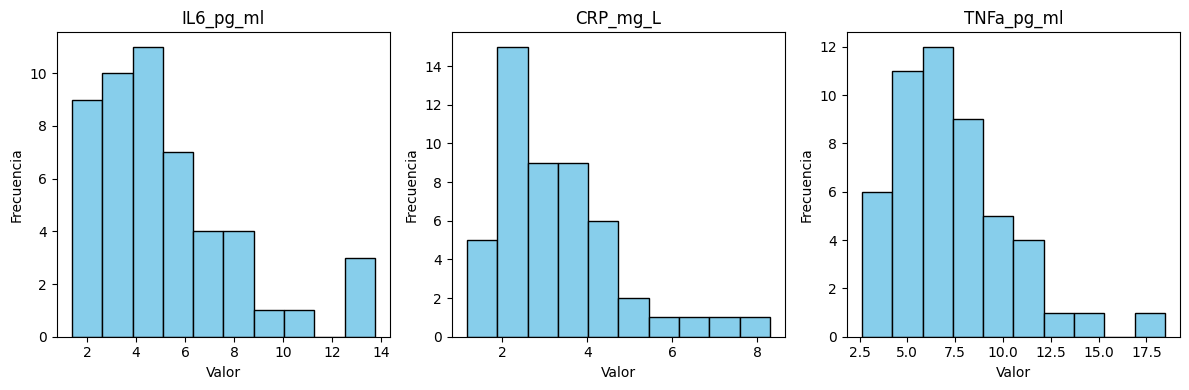

In [7]:
biomarcadores = ["IL6_pg_ml", "CRP_mg_L", "TNFa_pg_ml"]

plt.figure(figsize=(12, 4))  

for i, col in enumerate(biomarcadores):
    plt.subplot(1, 3, i+1)  
    plt.hist(df[col], bins=10, color="skyblue", edgecolor="black")  
    plt.title(col)  
    plt.xlabel("Valor")  
    plt.ylabel("Frecuencia") 


plt.tight_layout()
plt.show()


In [8]:
for col in ["IL6_pg_ml", "CRP_mg_L", "TNFa_pg_ml"]:
    stat, p = stats.shapiro(df[col].dropna())
    print(f"{col}: estadístico = {stat:.4f}, p-value = {p:.4g}")


IL6_pg_ml: estadístico = 0.8767, p-value = 8.925e-05
CRP_mg_L: estadístico = 0.8818, p-value = 0.0001269
TNFa_pg_ml: estadístico = 0.9212, p-value = 0.002603


In [15]:
# =============================================================================
# Seleccionar solo las columnas relevantes para el análisis
# =============================================================================

# Por ejemplo: suponiendo que tienes columnas 'grupo', 'tratamiento', 'IL6', 'CRP', 'TNF'
columnas_interes = ['age_years','sex',	'disease_stage',	'disease_duration_months', 'IL6_pg_ml',	'CRP_mg_L',	'TNFa_pg_ml']
df = df[columnas_interes].copy()

# Confirmamos estructura
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_years                50 non-null     int64  
 1   sex                      50 non-null     object 
 2   disease_stage            50 non-null     object 
 3   disease_duration_months  50 non-null     int64  
 4   IL6_pg_ml                50 non-null     float64
 5   CRP_mg_L                 50 non-null     float64
 6   TNFa_pg_ml               50 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.9+ KB


,age_years,sex,disease_stage,disease_duration_months,IL6_pg_ml,CRP_mg_L,TNFa_pg_ml
0,34,F,III,27,1.57,1.81,6.54
1,63,M,I,29,3.30,4.19,4.37
2,32,F,II,22,2.60,4.28,7.73
3,48,M,I,17,3.07,2.08,6.18
4,54,M,I,24,2.01,1.17,2.75


In [16]:
def build_cell_samples(
    df: pd.DataFrame,
    group_cols,                 # lista de factores, p.ej. ['sex', 'disease_stage']
    y_cols,                     # str (ANOVA) o list[str] (MANOVA)
    multivariate: bool
):
    """
    Crea una columna 'cell' (clave de celda), agrupa y devuelve:
      - cell_keys: lista ordenada (strings) con la etiqueta de cada celda ("F|I", "M|II", ...)
      - samples:   lista de arrays por celda:
          * ANOVA:  1D (n_i,) con la DV
          * MANOVA: 2D (n_i × p) con las DVs en el orden de y_cols
      - splitter:  función auxiliar para convertir una key -> dict{factor: nivel}
                   (la usamos luego para reconstruir el DataFrame)
    """
    if not isinstance(group_cols, (list, tuple)):
        group_cols = [group_cols]

    # 1) Creamos la clave de celda como string "A|B|C" (rápido y estable)
    #    Nota: si los factores ya son 'category', se respetará su orden interno.
    df = df.copy()
    df["cell"] = df[group_cols].astype(str).agg("|".join, axis=1)

    # 2) Orden determinista de celdas: por el orden alfabético de la clave 'cell'
    #    (si necesitas un orden específico de niveles, haz los factores 'category' con categorías ordenadas)
    groups = list(df.groupby("cell", sort=True))

    # 3) Armamos listas de claves y muestras por celda
    cell_keys = [name for name, _ in groups]
    if multivariate:
        if isinstance(y_cols, str):
            raise ValueError("Para MANOVA, y_cols debe ser list[str].")
        samples = [g[y_cols].to_numpy() for _, g in groups]          # (n_i × p)
    else:
        if isinstance(y_cols, (list, tuple)):
            raise ValueError("Para ANOVA, y_cols debe ser str (una DV).")
        samples = [g[y_cols].to_numpy() for _, g in groups]          # (n_i,)

    # 4) Pequeña utilidad para mapear "F|III" -> {'sex':'F', 'disease_stage':'III'}
    def splitter(key: str) -> dict:
        vals = key.split("|")
        return {c: v for c, v in zip(group_cols, vals)}

    return cell_keys, samples, splitter


def rebuild_df_from_bootstrap(
    cell_keys,                   # lista de strings "A|B|..."
    boot_arrays,                 # lista de arrays remuestreados por celda (en el mismo orden)
    group_cols,                  # lista de factores
    y_cols                       # str (ANOVA) o list[str] (MANOVA)
) -> pd.DataFrame:
    """
    Reconstruye un DataFrame a partir de:
      - cell_keys: p.ej., ["F|I", "F|II", "M|I", ...]
      - boot_arrays: datos remuestreados de cada celda (en el mismo orden)
      - group_cols: nombres de factores
      - y_cols: str (ANOVA) o list[str] (MANOVA)
    """
    if not isinstance(group_cols, (list, tuple)):
        group_cols = [group_cols]

    # 1) Calculamos los tamaños por celda (n_i) para repetir las etiquetas
    sizes = [arr.shape[0] for arr in boot_arrays]                 # longitudes de cada muestra
    total_n = int(np.sum(sizes))                                  # total de filas

    # 2) Construimos columnas de factores replicando niveles según n_i
    #    - Para cada celda "A|B", dividimos por '|' y agregamos 'A' repetida n_i veces a la columna del factor 1,
    #      'B' repetida n_i veces a la columna del factor 2, etc.
    factor_cols = {c: np.empty(total_n, dtype=object) for c in group_cols}
    pos = 0
    for key, n_i in zip(cell_keys, sizes):
        vals = key.split("|")                                     # ['F', 'I'] por ejemplo
        for j, c in enumerate(group_cols):
            factor_cols[c][pos:pos+n_i] = vals[j]
        pos += n_i

    # 3) Unimos los datos de respuesta (concatenados) con los factores
    if isinstance(y_cols, str):                                   # ANOVA: una DV
        y_concat = np.concatenate(boot_arrays, axis=0)            # (n_total,)
        df_b = pd.DataFrame({y_cols: y_concat, **factor_cols})
    else:                                                         # MANOVA: varias DVs
        Y_concat = np.vstack(boot_arrays)                         # (n_total × p)
        df_b = pd.DataFrame({**{d: Y_concat[:, j] for j, d in enumerate(y_cols)}, **factor_cols})

    return df_b
# =============================================================================
# Utilidad: construir ÍNDICES por celda (para remuestrear filas completas)
# =============================================================================

import numpy as np
import pandas as pd

def build_cell_index_samples(df: pd.DataFrame, group_cols):
    """
    Devuelve:
      - cell_keys: lista de etiquetas de celda (e.g. 'F|I', 'M|III', ...)
      - cell_index_arrays: lista de arrays 1D con los ÍNDICES de filas por celda.
    Notas:
      * No modifica el df.
      * Soporta tamaños desbalanceados entre celdas.
    """
    if not isinstance(group_cols, (list, tuple)):
        group_cols = [group_cols]

    # Clave de celda como string "A|B|..." para agrupar
    gkey = df[group_cols].astype(str).agg("|".join, axis=1)

    # Agrupar y recolectar índices por celda (orden determinista por clave)
    groups = list(df.groupby(gkey, sort=True))
    cell_keys = [name for name, _ in groups]
    cell_index_arrays = [g.index.to_numpy() for _, g in groups]

    return cell_keys, cell_index_arrays


In [ ]:
# -----------------------------------------------------------------------------
# Estas funciones NO hacen bootstrap. Solo calculan el estadístico “observado”
# con el pipeline habitual de statsmodels. Luego el bootstrap re-usará esto
# en cada réplica remuestreada.
# =============================================================================

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.multivariate.manova import MANOVA


def anova_F_observado(df: pd.DataFrame, formula: str, typ: int = 2) -> pd.Series:
    """
    Calcula la ANOVA clásica y devuelve una Serie con los F observados por término.
    - df: DataFrame con la DV y los factores
    - formula: 'DV ~ C(factor1)*C(factor2)+...' (misma notación que ya usas)
    - typ: 2 o 3 (sumas de cuadrados tipo II o III)
    Devuelve:
      Serie pandas: índice = término del modelo (e.g., 'C(sex)', 'C(disease_stage)', 'C(sex):C(disease_stage)'),
      valores = estadísticos F (sin incluir 'Residual').
    """
    mod = smf.ols(formula, data=df).fit()     # Ajusta OLS con la fórmula dada
    aov = anova_lm(mod, typ=typ)              # Obtiene la tabla ANOVA (SS, MS, F, p, etc.)
    F = aov['F'].dropna()                     # Quita filas sin F (p.ej., 'Residual'); quedas solo con términos
    return F


# =============================================================================
# MANOVA extendida: devuelve todos los tests (Pillai, Wilks, HL, Roy)
# =============================================================================

def manova_stats_todos(
    df: pd.DataFrame,
    dvs: list[str],
    formula_rhs: str
) -> pd.DataFrame:
    """
    Ejecuta MANOVA y devuelve un DataFrame con todos los tests por término:
      - Columnas: 'Pillai', 'Wilks', 'Hotelling-Lawley', 'Roy'
      - Filas: términos del modelo (sin 'Intercept')
    """
    # Construimos la fórmula general 'y1 + y2 + ... ~ factores'
    formula = ' + '.join(dvs) + ' ~ ' + formula_rhs

    # Ejecutamos MANOVA con statsmodels
    mv = MANOVA.from_formula(formula, data=df).mv_test()
    res = mv.results

    # Extraemos los cuatro tests por término (sin el intercepto)
    terms = [t for t in res.keys() if t.lower() != 'intercept']
    data = []
    for term in terms:
        stat = res[term]['stat']
        data.append([
            stat.loc["Pillai's trace", 'Value'],
            stat.loc["Wilks' lambda", 'Value'],
            stat.loc["Hotelling-Lawley trace", 'Value'],
            stat.loc["Roy's greatest root", 'Value']
        ])

    # Organizamos todo en un DataFrame bonito
    df_stats = pd.DataFrame(
        data,
        index=terms,
        columns=['Pillai', 'Wilks', 'Hotelling-Lawley', 'Roy']
    )
    return df_stats


In [18]:
# =============================================================================
# Bootstrap ANOVA (Percentil / BCa) 
# -----------------------------------------------------------------------------
# Requiere que ya estén definidas:
#   - build_cell_samples(df, group_cols, y_cols, multivariate=False)
#   - rebuild_df_from_bootstrap(cell_keys, boot_arrays, group_cols, y_cols)
#   - anova_F_observado(df, formula, typ)
# =============================================================================

import numpy as np
from scipy.stats import bootstrap

def bootstrap_anova_percentil_bca(
    df,
    formula,            # ej: "IL6_pg_ml ~ C(sex)*C(disease_stage) + age_years + disease_duration_months"
    group_cols,         # ej: ['sex','disease_stage'] (definen las celdas del diseño)
    n_resamples=2000,   # B
    typ=2,              # SS tipo II o III (lo mismo que usas en clase)
    method="BCa",       # "percentile" o "BCa" (recomendado BCa)
    seed=0
):
    # ------------------------------
    # 0) Preparación básica
    # ------------------------------
    if not isinstance(group_cols, (list, tuple)):
        group_cols = [group_cols]
    rng = np.random.default_rng(seed)

    # Nombre de la DV (lado izquierdo de la fórmula), ej. "IL6_pg_ml"
    lhs = formula.split('~')[0].strip()

    # ------------------------------
    # 1) Estadístico observado (ANOVA normal con statsmodels)
    # ------------------------------
    F_obs = anova_F_observado(df, formula=formula, typ=typ)  # Serie: términos -> F
    terms = F_obs.index.tolist()                              # guardamos el orden de términos

    # ------------------------------
    # 2) Armamos las MUESTRAS por CELDA con tus utilidades
    #    (una array 1D por celda, en el mismo orden de cell_keys)
    # ------------------------------
    cell_keys, cell_samples, _ = build_cell_samples(
        df=df,
        group_cols=group_cols,
        y_cols=lhs,
        multivariate=False
    )

    # ------------------------------
    # 3) Función-estadístico para SciPy:
    #    - Recibe una TUPLA con los arrays remuestreados por celda (en el mismo orden de cell_keys)
    #    - Reconstruye un df con rebuild_df_from_bootstrap
    #    - Calcula ANOVA y devuelve un vector con F en el orden 'terms'
    # ------------------------------
    def stat_func(*cell_arrays):
        df_b = rebuild_df_from_bootstrap(
            cell_keys=cell_keys,
            boot_arrays=list(cell_arrays),
            group_cols=group_cols,
            y_cols=lhs
        )
        F_b = anova_F_observado(df_b, formula=formula, typ=typ)
        # Vectoriza en el orden de 'terms' (si un término no aparece, usamos 0.0 para robustez)
        return np.array([F_b.get(t, 0.0) for t in terms], dtype=float)

    # ------------------------------
    # 4) SciPy bootstrap (Percentil/BCa) — remuestreo ESTRATIFICADO por celdas
    # ------------------------------
    res = bootstrap(
        data=tuple(cell_samples),   # una muestra (array 1D) por celda
        statistic=stat_func,        # devuelve vector con F por término
        vectorized=False,           # nuestra función no es vectorizada
        paired=True,                # estratifica: remuestrea cada celda por separado
        n_resamples=n_resamples,    # B
        method=method,              # "percentile" o "BCa"
        random_state=rng
    )

    # ------------------------------
    # 5) Empaquetar resultados: distribución bootstrap y p_boot
    # ------------------------------
    boot_mat = res.bootstrap_distribution      # matriz (B × n_terms)
    boot_dist = {t: boot_mat[:, i] for i, t in enumerate(terms)}  # dict término->array F*
    p_boot = {t: np.mean(boot_dist[t] >= F_obs[t]) for t in terms}  # cola derecha

    return F_obs, p_boot, boot_dist, res


In [19]:
import numpy as np
from scipy.stats import bootstrap
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

def bootstrap_anova_percentil_bca(
    df,
    formula,            # ej: "IL6_pg_ml ~ C(sex)*C(disease_stage) + age_years + disease_duration_months"
    group_cols,         # ej: ['sex','disease_stage']
    n_resamples=2000,
    typ=2,
    method="BCa",
    seed=0
):
    """
    ANOVA bootstrap estratificado por celdas remuestreando ÍNDICES de fila.
    Esto preserva DV, factores y COVARIABLES completas en cada réplica.
    Usa paired=False y axis=0 para permitir tamaños de celda desbalanceados.
    """
    if not isinstance(group_cols, (list, tuple)):
        group_cols = [group_cols]
    rng = np.random.default_rng(seed)

    # 1) Estadístico observado (tabla ANOVA clásica)
    mod_obs = smf.ols(formula, data=df).fit()
    aov_obs = anova_lm(mod_obs, typ=typ)
    F_obs = aov_obs['F'].dropna()
    terms = F_obs.index.tolist()

    # 2) ÍNDICES por celda (no datos). Cada array puede tener tamaño distinto (desbalanceado)
    cell_keys, cell_index_arrays = build_cell_index_samples(df, group_cols)

    # 3) Función-estadístico: recibe arrays de índices remuestreados y arma df_b con filas completas
    def stat_func(*boot_index_arrays):
        # Concatenamos los índices remuestreados de todas las celdas
        take = np.concatenate(boot_index_arrays, axis=0)
        # Subdataframe de la réplica con TODAS las columnas necesarias (DV, factores, covariables)
        df_b = df.loc[take]
        # Recalcular ANOVA
        m_b = smf.ols(formula, data=df_b).fit()
        a_b = anova_lm(m_b, typ=typ)
        # Vector de F en el mismo orden de 'terms' (si falta, 0.0)
        return np.array([a_b.loc[t, 'F'] if t in a_b.index else 0.0 for t in terms], dtype=float)

    # 4) SciPy bootstrap: remuestrear por filas en cada celda (longitudes distintas OK)
    res = bootstrap(
        data=tuple(cell_index_arrays),  # tuple de arrays de ÍNDICES (uno por celda)
        statistic=stat_func,
        vectorized=False,
        paired=False,                   # celdas pueden tener tamaños distintos
        axis=0,                         # remuestrea a lo largo de las filas (índices)
        n_resamples=n_resamples,
        method=method,
        random_state=rng
    )

    # 5) Distribución y p_boot
    boot_mat = res.bootstrap_distribution  # (B × n_terms)
    boot_dist = {t: boot_mat[:, i] for i, t in enumerate(terms)}
    p_boot = {t: np.mean(boot_dist[t] >= F_obs[t]) for t in terms}

    return F_obs, p_boot, boot_dist, res



In [20]:
import numpy as np
from scipy.stats import bootstrap
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

def bootstrap_manova_percentil_bca(
    df,
    dvs,                 # ['IL6_pg_ml','CRP_mg_L','TNFa_pg_ml']
    formula_rhs,         # 'C(sex)*C(disease_stage) + age_years + disease_duration_months'
    group_cols,          # ['sex','disease_stage']
    n_resamples=2000,
    method="BCa",
    seed=0
):
    """
    MANOVA bootstrap estratificado por celdas remuestreando ÍNDICES de fila.
    Preserva DVs, factores y covariables completas en cada réplica.
    Devuelve p_boot para Pillai, Wilks, HL y Roy por término.
    """
    if not isinstance(group_cols, (list, tuple)):
        group_cols = [group_cols]
    rng = np.random.default_rng(seed)
    test_order = ['Pillai', 'Wilks', 'Hotelling-Lawley', 'Roy']

    # 1) Observados (tabla términos × tests)
    obs_df = manova_stats_todos(df, dvs=dvs, formula_rhs=formula_rhs)
    terms = obs_df.index.tolist()
    K = len(terms)
    stat_obs = {tname: obs_df[tname].to_dict() for tname in test_order}

    # 2) ÍNDICES por celda
    cell_keys, cell_index_arrays = build_cell_index_samples(df, group_cols)

    # 3) Función-estadístico: arma df_b con filas completas y calcula MANOVA (todos los tests)
    def stat_func(*boot_index_arrays):
        take = np.concatenate(boot_index_arrays, axis=0)
        df_b = df.loc[take]
        stats_b = manova_stats_todos(df_b, dvs=dvs, formula_rhs=formula_rhs)  # términos × tests
        # Vector concatenado en orden fijo por test y términos
        parts = [stats_b.reindex(index=terms)[col].fillna(0.0).to_numpy()
                 for col in test_order]
        return np.concatenate(parts, axis=0).astype(float)

    # 4) SciPy bootstrap: permitir tamaños distintos entre celdas
    res = bootstrap(
        data=tuple(cell_index_arrays),  # tuple de arrays de ÍNDICES (uno por celda)
        statistic=stat_func,
        vectorized=False,
        paired=False,
        axis=0,
        n_resamples=n_resamples,
        method=method,
        random_state=rng
    )

    # 5) Reorganizar distribución y calcular p_boot (colas correctas)
    mat = res.bootstrap_distribution  # (B × 4K)
    boot_dist = {
        'Pillai': {terms[i]: mat[:, i]           for i in range(0,      K)},
        'Wilks':  {terms[i]: mat[:, K + i]       for i in range(0,      K)},
        'HL':     {terms[i]: mat[:, 2*K + i]     for i in range(0,      K)},
        'Roy':    {terms[i]: mat[:, 3*K + i]     for i in range(0,      K)},
    }
    p_boot = {
        'Pillai': {t: np.mean(boot_dist['Pillai'][t] >= stat_obs['Pillai'][t]) for t in terms},
        'HL':     {t: np.mean(boot_dist['HL'][t]     >= stat_obs['Hotelling-Lawley'][t]) for t in terms},
        'Roy':    {t: np.mean(boot_dist['Roy'][t]    >= stat_obs['Roy'][t]) for t in terms},
        'Wilks':  {t: np.mean(boot_dist['Wilks'][t]  <= stat_obs['Wilks'][t]) for t in terms},
    }

    return terms, stat_obs, p_boot, boot_dist, res


In [21]:
# ANOVA
F_obs, pB_anova, Fstar, resA = bootstrap_anova_percentil_bca(
    df=df,
    formula="IL6_pg_ml ~ C(sex)",
    group_cols=["sex","disease_stage"],
    n_resamples=1500,
    typ=2,
    method="BCa",
    seed=42
)

# MANOVA
terms, stat_obs, pB_manova, boot_distM, resM = bootstrap_manova_percentil_bca(
    df=df,
    dvs=['IL6_pg_ml','CRP_mg_L','TNFa_pg_ml'],
    formula_rhs='C(sex)',
    group_cols=['sex','disease_stage'],
    n_resamples=1500,
    method="BCa",
    seed=7
)


In [24]:
# =============================================================================
# ANOVA bootstrap (estratificado por celdas) — desde cero
# -----------------------------------------------------------------------------
# • Siempre estratifica por los factores en `group_cols` (sin opción global).
# • Remuestrea FILAS completas dentro de cada celda (mantiene DV, factores y covariables).
# • Recalcula ANOVA (statsmodels) en cada réplica.
# • Devuelve: F observado, distribución F*, p_boot y CIs percentil; además un resumen bonito.
# =============================================================================

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

def anova_bootstrap_stratified(
    df: pd.DataFrame,
    formula: str,                   # ej: "IL6_pg_ml ~ C(sex)*C(disease_stage) + age_years + disease_duration_months"
    group_cols,                     # ej: ['sex','disease_stage']  (OBLIGATORIO → define celdas)
    B: int = 2000,                  # nº de réplicas bootstrap
    typ: int = 2,                   # SS tipo II (o 3 si lo prefieres)
    alpha: float = 0.05,            # para cuantiles/IC
    seed: int | None = 0,           # semilla reproducible
    progress: bool = False          # imprime progreso cada ~10%
):
    """
    ANOVA con bootstrap estratificado por celdas definidas por `group_cols`.

    Pasos:
      1) Calcula ANOVA observado (F por término).
      2) Construye celdas (combinaciones de niveles) en `group_cols`.
      3) Para b=1..B, remuestrea con reemplazo DENTRO de cada celda (mismo tamaño por celda),
         arma df_b con esas filas completas y recalcula ANOVA → F*_b por término.
      4) p_boot = P(F* ≥ F_obs) por término.  IC percentil 95% de F*.

    Retorna:
      F_obs   : pd.Series (términos → F observado)
      F_star  : dict[str, np.ndarray]  (término → array (B,) de F*)
      p_boot  : dict[str, float]
      ci      : dict[str, tuple(low, high)]  (IC percentil de F*)
      summary : pd.DataFrame con columnas: [F_obs, p_boot, q_(1-alpha), CI_low, CI_high]
    """
    # --- Validaciones básicas ---
    if group_cols is None or (isinstance(group_cols, (list, tuple)) and len(group_cols) == 0):
        raise ValueError("Debes especificar al menos un factor en `group_cols` para estratificar.")
    if not isinstance(group_cols, (list, tuple)):
        group_cols = [group_cols]
    rng = np.random.default_rng(seed)

    # --- 1) ANOVA observado (pipeline 'normal') ---
    mod = smf.ols(formula, data=df).fit()
    aov = anova_lm(mod, typ=typ)
    F_obs = aov["F"].dropna()                 # Serie: términos -> F (sin Residual/NaN)
    terms = F_obs.index.tolist()
    n_terms = len(terms)

    # --- 2) Celdas: índices de filas por combinación de niveles ---
    #     Clave de celda "A|B|..." y agrupación ordenada para orden determinista.
    cell_key = df[group_cols].astype(str).agg("|".join, axis=1)
    groups = list(df.groupby(cell_key, sort=True))
    cell_index_arrays = [g.index.to_numpy() for _, g in groups]

    # Sanidad: que ninguna celda esté vacía
    if any(len(idx) == 0 for idx in cell_index_arrays):
        raise ValueError("Hay celdas vacías en el diseño. Revisa `group_cols` y niveles.")

    # --- 3) Bucle bootstrap (remuestreo dentro de cada celda) ---
    F_mat = np.full((B, n_terms), np.nan, dtype=float)
    for b in range(B):
        # 3.1) para cada celda, sampleo con reemplazo el MISMO tamaño original
        boot_idx_parts = [rng.choice(idx, size=len(idx), replace=True) for idx in cell_index_arrays]
        take = np.concatenate(boot_idx_parts, axis=0)

        # 3.2) sub-DataFrame de la réplica (filas completas: DV+factores+covariables)
        df_b = df.loc[take]

        # 3.3) ANOVA en la réplica
        try:
            m_b = smf.ols(formula, data=df_b).fit()
            a_b = anova_lm(m_b, typ=typ)
            # guardo F* en el orden de 'terms'; si falta algún término -> NaN
            F_mat[b, :] = [a_b.loc[t, "F"] if t in a_b.index else np.nan for t in terms]
        except Exception:
            # si statsmodels falla (singularidad), dejamos NaN para esta réplica
            pass

        if progress and (b + 1) % max(1, B // 10) == 0:
            print(f"{b+1}/{B} réplicas...", end="\r")

    # --- 4) Salidas: F*, p_boot, IC, y resumen ---
    F_star = {t: F_mat[:, i] for i, t in enumerate(terms)}
    # p_boot (cola derecha) e IC percentil ignorando NaN
    p_boot = {t: float(np.mean(F_star[t] >= F_obs[t])) for t in terms}
    ci = {
        t: (float(np.nanpercentile(F_star[t], 100*alpha/2)),
            float(np.nanpercentile(F_star[t], 100*(1 - alpha/2))))
        for t in terms
    }
    q_1mA = {t: float(np.nanpercentile(F_star[t], 100*(1 - alpha))) for t in terms}

    summary = pd.DataFrame({
        "F_obs": F_obs,
        "p_boot": pd.Series(p_boot),
        f"q_{1-alpha:.2f}": pd.Series(q_1mA),
        "CI_low": pd.Series({t: ci[t][0] for t in terms}),
        "CI_high": pd.Series({t: ci[t][1] for t in terms}),
    }).loc[terms]

    return F_obs, F_star, p_boot, ci, summary


In [25]:
F_obs, Fstar, pB, ci, resumen = anova_bootstrap_stratified(
    df=df,
    formula="IL6_pg_ml ~ C(sex)*C(disease_stage)",
    group_cols=["sex","disease_stage"],
    B=2000,
    typ=2,
    alpha=0.05,
    seed=42,
    progress=True
)


resumen


2000/2000 réplicas...

,F_obs,p_boot,q_0.95,CI_low,CI_high
C(sex),6.239463,0.5715,18.229037,0.664690,21.755818
C(disease_stage),0.570912,0.7370,5.278271,0.050803,6.476360
C(sex):C(disease_stage),1.708434,0.6755,7.178209,0.214331,8.727680


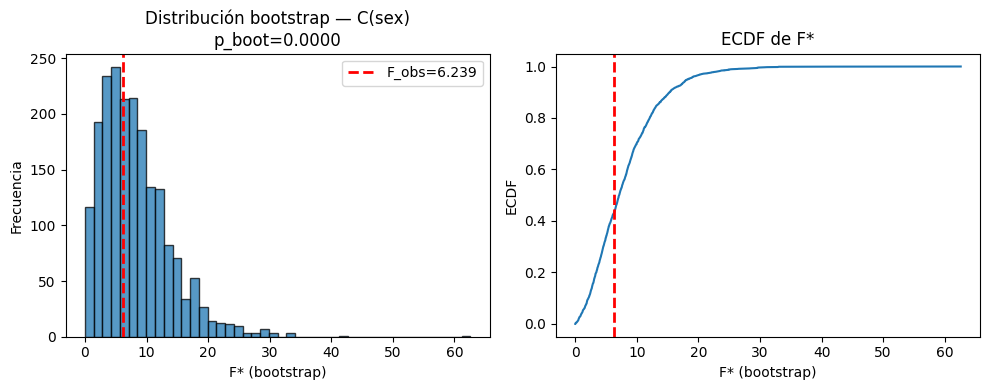

In [26]:
def plot_bootstrap_anova_robusto(term, F_obs, boot_dist, p_boot):
    vals = np.asarray(boot_dist[term], float)
    obs  = float(F_obs[term])
    p    = float(p_boot[term])

    B = len(vals)
    nunique = np.unique(vals).size
    nzeros  = np.sum(np.isclose(vals, 0))

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # — Histograma o gráfico de barras discreto si hay pocos únicos —
    if nunique <= 15:
        uniq, counts = np.unique(vals, return_counts=True)
        ax[0].bar(uniq, counts, width=0.08*(uniq.max()-uniq.min()+1) if uniq.size>1 else 0.5, edgecolor="k")
        ax[0].set_xlabel("F* (bootstrap)")
        ax[0].set_ylabel("Frecuencia")
    else:
        bins = max(10, min(50, int(np.sqrt(B))))
        ax[0].hist(vals, bins=bins, alpha=0.75, edgecolor='k')
        ax[0].set_xlabel("F* (bootstrap)")
        ax[0].set_ylabel("Frecuencia")

    ax[0].axvline(obs, color='red', linestyle='--', linewidth=2, label=f"F_obs={obs:.3f}")
    ax[0].legend()
    ax[0].set_title(f"Distribución bootstrap — {term}\np_boot={p:.4f}")

    # — ECDF (siempre informativa aunque haya empates) —
    x = np.sort(vals)
    y = np.arange(1, B+1)/B
    ax[1].plot(x, y)
    ax[1].axvline(obs, color='red', linestyle='--', linewidth=2)
    ax[1].set_xlabel("F* (bootstrap)")
    ax[1].set_ylabel("ECDF")
    ax[1].set_title("ECDF de F*")

    plt.tight_layout()
    plt.show()

# Ejemplo:
plot_bootstrap_anova_robusto("C(sex)", F_obs, Fstar, pB_anova)


In [27]:
import numpy as np
import pandas as pd
from scipy.stats import bootstrap

# --- 0) Extrae las dos muestras (ajusta nombres de columnas/níveles) ---
x = df.loc[df["sex"] == "M", "IL6_pg_ml"].to_numpy()
y = df.loc[df["sex"] == "F", "IL6_pg_ml"].to_numpy()

# --- 1) Estadísticos OBSERVADOS (Welch) ---
def mean_diff(a, b, axis=0):
    # diferencia de medias (a - b)
    return np.mean(a, axis=axis) - np.mean(b, axis=axis)

def welch_t(a, b, axis=0):
    # t de Welch: (m1-m2) / sqrt(s1^2/n1 + s2^2/n2)
    a = np.asarray(a); b = np.asarray(b)
    m1 = np.mean(a, axis=axis); m2 = np.mean(b, axis=axis)
    v1 = np.var(a, axis=axis, ddof=1); v2 = np.var(b, axis=axis, ddof=1)
    n1 = a.shape[axis];            n2 = b.shape[axis]
    se = np.sqrt(v1/n1 + v2/n2)
    return (m1 - m2) / se

diff_hat = mean_diff(x, y)                   # diferencia observada
t_obs    = welch_t(x, y)                     # t de Welch observado
# SE "de Welch" en la muestra original (lo usamos para bootstrap-t)
se_hat   = np.sqrt(np.var(x, ddof=1)/len(x) + np.var(y, ddof=1)/len(y))

# --- 2) BCa para la DIFERENCIA DE MEDIAS (no paramétrico, i.i.d.) ---
#     Usamos directamente scipy.stats.bootstrap con method="BCa".
res_bca = bootstrap(
    data=(x, y),
    statistic=mean_diff,      # el estadístico es la diferencia de medias
    vectorized=False,
    paired=False,             # muestras independientes
    axis=0,
    n_resamples=5000,
    method="BCa",
    random_state=42
)
ci_bca_low, ci_bca_high = float(res_bca.confidence_interval.low), float(res_bca.confidence_interval.high)

# --- 3) Bootstrap-t (studentized) para la diferencia ---
#     Idea: generamos la distribución de t* (Welch) y tomamos sus percentiles.
#     Luego:  IC_t = diff_hat ± t*_(α/2, 1-α/2) × se_hat  (usando el SE de la muestra original)
res_t = bootstrap(
    data=(x, y),
    statistic=welch_t,        # devolvemos t* directamente
    vectorized=False,
    paired=False,
    axis=0,
    n_resamples=5000,
    method="percentile",      # el método aquí solo afecta al CI de t*, que no usaremos
    random_state=43
)
t_star = res_t.bootstrap_distribution.ravel()
alpha = 0.05
tq_low, tq_high = np.quantile(t_star, [alpha/2, 1 - alpha/2])
ci_t_low  = float(diff_hat - tq_high * se_hat)   # ojo: invierte colas al reconstruir
ci_t_high = float(diff_hat - tq_low  * se_hat)

# --- 4) p-bootstrap (bilateral) usando t* ---
p_boot_two_sided = float(np.mean(np.abs(t_star) >= abs(t_obs)))

# --- 5) Imprime resultados claros ---
print("== Dos muestras (t de Welch) con bootstrap ==\n")
print(f"n_M = {len(x)}, n_F = {len(y)}")
print(f"Dif. de medias observada (M - F): {diff_hat:.4f}")
print(f"t de Welch observado:            {t_obs:.4f}\n")

print("IC 95% (BCa) para la DIFERENCIA de medias:")
print(f"[{ci_bca_low:.4f}, {ci_bca_high:.4f}]  (B = {len(res_bca.bootstrap_distribution)})\n")

print("IC 95% (Bootstrap-t) para la DIFERENCIA de medias:")
print(f"[{ci_t_low:.4f}, {ci_t_high:.4f}]     (B = {len(t_star)})\n")

print(f"p-bootstrap (bilateral) basado en |t*|: {p_boot_two_sided:.4f}")

# (Opcional) Conclusión automática
if p_boot_two_sided < 0.05:
    print("\nConclusión: diferencia significativa entre medias (α=0.05) según bootstrap.")
else:
    print("\nConclusión: no hay evidencia suficiente de diferencia entre medias (α=0.05) según bootstrap.")


== Dos muestras (t de Welch) con bootstrap ==

n_M = 27, n_F = 23
Dif. de medias observada (M - F): -2.0941
t de Welch observado:            -2.6084

IC 95% (BCa) para la DIFERENCIA de medias:
[-3.7094, -0.6402]  (B = 5000)

IC 95% (Bootstrap-t) para la DIFERENCIA de medias:
[-1.4368, 1.5304]     (B = 5000)

p-bootstrap (bilateral) basado en |t*|: 0.5182

Conclusión: no hay evidencia suficiente de diferencia entre medias (α=0.05) según bootstrap.


=== BCa (diferencia de medias) ===
Dif. observada: -2.094
IC 95% BCa: [-3.709, -0.640]

=== Bootstrap-t (diferencia de medias) ===
Dif. observada: -2.094
IC 95% Bootstrap-t: [-1.437, 1.530]
p_boot (bilateral): 0.5182



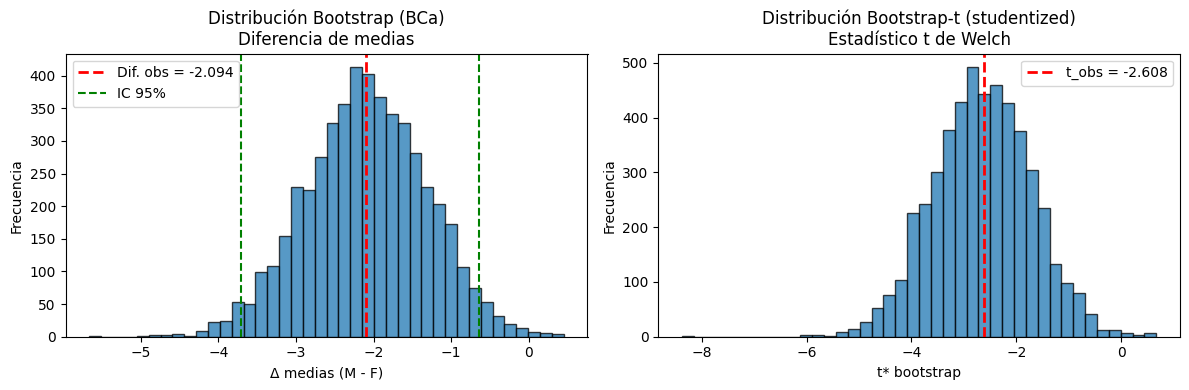

In [28]:
import numpy as np
import pandas as pd
from scipy.stats import bootstrap
import matplotlib.pyplot as plt

# --- 1) Extrae las dos muestras ---
x = df.loc[df["sex"] == "M", "IL6_pg_ml"].to_numpy()
y = df.loc[df["sex"] == "F", "IL6_pg_ml"].to_numpy()

# --- 2) Funciones auxiliares ---
def mean_diff(a, b, axis=0):
    return np.mean(a, axis=axis) - np.mean(b, axis=axis)

def welch_t(a, b, axis=0):
    a = np.asarray(a); b = np.asarray(b)
    m1, m2 = np.mean(a, axis=axis), np.mean(b, axis=axis)
    v1, v2 = np.var(a, axis=axis, ddof=1), np.var(b, axis=axis, ddof=1)
    n1, n2 = a.shape[axis], b.shape[axis]
    se = np.sqrt(v1/n1 + v2/n2)
    return (m1 - m2) / se

# --- 3) Observados ---
diff_hat = mean_diff(x, y)
t_obs    = welch_t(x, y)
se_hat   = np.sqrt(np.var(x, ddof=1)/len(x) + np.var(y, ddof=1)/len(y))

# --- 4) Bootstrap BCa (para la diferencia de medias) ---
res_bca = bootstrap(
    data=(x, y),
    statistic=mean_diff,
    vectorized=False,
    paired=False,
    axis=0,
    n_resamples=5000,
    method="BCa",
    random_state=42
)
boot_mean = res_bca.bootstrap_distribution.ravel()

ci_bca_low, ci_bca_high = (
    float(res_bca.confidence_interval.low),
    float(res_bca.confidence_interval.high)
)

# --- 5) Bootstrap-t (para t de Welch) ---
res_t = bootstrap(
    data=(x, y),
    statistic=welch_t,
    vectorized=False,
    paired=False,
    axis=0,
    n_resamples=5000,
    method="percentile",
    random_state=43
)
t_star = res_t.bootstrap_distribution.ravel()
alpha = 0.05
tq_low, tq_high = np.quantile(t_star, [alpha/2, 1 - alpha/2])
ci_t_low  = diff_hat - tq_high * se_hat
ci_t_high = diff_hat - tq_low  * se_hat
p_boot_two_sided = np.mean(np.abs(t_star) >= abs(t_obs))

# --- 6) Resultados numéricos ---
print("=== BCa (diferencia de medias) ===")
print(f"Dif. observada: {diff_hat:.3f}")
print(f"IC 95% BCa: [{ci_bca_low:.3f}, {ci_bca_high:.3f}]\n")

print("=== Bootstrap-t (diferencia de medias) ===")
print(f"Dif. observada: {diff_hat:.3f}")
print(f"IC 95% Bootstrap-t: [{ci_t_low:.3f}, {ci_t_high:.3f}]")
print(f"p_boot (bilateral): {p_boot_two_sided:.4f}\n")

# --- 7) Gráficos comparativos ---
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Histograma BCa
axs[0].hist(boot_mean, bins=40, edgecolor='k', alpha=0.75)
axs[0].axvline(diff_hat, color='red', ls='--', lw=2, label=f"Dif. obs = {diff_hat:.3f}")
axs[0].axvline(ci_bca_low, color='green', ls='--', label='IC 95%')
axs[0].axvline(ci_bca_high, color='green', ls='--')
axs[0].set_title("Distribución Bootstrap (BCa)\nDiferencia de medias")
axs[0].set_xlabel("Δ medias (M - F)")
axs[0].set_ylabel("Frecuencia")
axs[0].legend()

# Histograma Bootstrap-t
axs[1].hist(t_star, bins=40, edgecolor='k', alpha=0.75)
axs[1].axvline(t_obs, color='red', ls='--', lw=2, label=f"t_obs = {t_obs:.3f}")
axs[1].set_title("Distribución Bootstrap-t (studentized)\nEstadístico t de Welch")
axs[1].set_xlabel("t* bootstrap")
axs[1].set_ylabel("Frecuencia")
axs[1].legend()

plt.tight_layout()
plt.show()


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

# Ajusta si tus niveles/columnas tienen otro nombre
x = df.loc[df["sex"] == "M", "IL6_pg_ml"].to_numpy()
y = df.loc[df["sex"] == "F", "IL6_pg_ml"].to_numpy()

# Funciones del estadístico
def mean_diff(a, b, axis=0):
    """Diferencia de medias a - b."""
    return np.mean(a, axis=axis) - np.mean(b, axis=axis)

def welch_t(a, b, axis=0):
    """t de Welch para dos muestras independientes con varianzas desiguales."""
    a = np.asarray(a); b = np.asarray(b)
    m1, m2 = np.mean(a, axis=axis), np.mean(b, axis=axis)
    v1, v2 = np.var(a, axis=axis, ddof=1), np.var(b, axis=axis, ddof=1)
    n1, n2 = a.shape[axis], b.shape[axis]
    se = np.sqrt(v1/n1 + v2/n2)
    return (m1 - m2) / se

# Observados
diff_hat = mean_diff(x, y)
t_obs    = welch_t(x, y)
se_hat   = np.sqrt(np.var(x, ddof=1)/len(x) + np.var(y, ddof=1)/len(y))  # SE de Welch
alpha    = 0.05
B        = 5000

print(f"n_M={len(x)}, n_F={len(y)}")
print(f"Diferencia de medias observada (M - F): {diff_hat:.4f}")
print(f"t de Welch observado: {t_obs:.4f}")


n_M=27, n_F=23
Diferencia de medias observada (M - F): -2.0941
t de Welch observado: -2.6084


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

# Selecciona las dos muestras a comparar
x = df.loc[df["sex"] == "M", "IL6_pg_ml"].to_numpy()
y = df.loc[df["sex"] == "F", "IL6_pg_ml"].to_numpy()

# Funciones del estadístico
def mean_diff(a, b, axis=0):
    """Diferencia de medias a - b."""
    return np.mean(a, axis=axis) - np.mean(b, axis=axis)

def welch_t(a, b, axis=0):
    """t de Welch para dos muestras independientes con varianzas desiguales."""
    a = np.asarray(a); b = np.asarray(b)
    m1, m2 = np.mean(a, axis=axis), np.mean(b, axis=axis)
    v1, v2 = np.var(a, axis=axis, ddof=1), np.var(b, axis=axis, ddof=1)
    n1, n2 = a.shape[axis], b.shape[axis]
    se = np.sqrt(v1/n1 + v2/n2)
    return (m1 - m2) / se

# Estadísticos observados
diff_hat = mean_diff(x, y)
t_obs    = welch_t(x, y)
se_hat   = np.sqrt(np.var(x, ddof=1)/len(x) + np.var(y, ddof=1)/len(y))  # SE de Welch
alpha, B = 0.05, 5000

print(f"n_M={len(x)}, n_F={len(y)}")
print(f"Diferencia de medias observada (M - F): {diff_hat:.4f}")
print(f"t de Welch observado: {t_obs:.4f}")


n_M=27, n_F=23
Diferencia de medias observada (M - F): -2.0941
t de Welch observado: -2.6084


## Método BCa — Intervalo de confianza para la diferencia de medias

El método BCa (Bias-Corrected and Accelerated) ajusta los percentiles del intervalo de confianza
para compensar posibles sesgos o asimetrías en la distribución bootstrap del estadístico.

Aplicamos BCa a la **diferencia de medias (M − F)**.


In [31]:
# Bootstrap BCa para la diferencia de medias
res_bca = bootstrap(
    data=(x, y),
    statistic=mean_diff,
    vectorized=False,
    paired=False,
    axis=0,
    n_resamples=B,
    method="BCa",
    random_state=42
)

boot_mean = res_bca.bootstrap_distribution.ravel()
ci_bca_low  = float(res_bca.confidence_interval.low)
ci_bca_high = float(res_bca.confidence_interval.high)

print("BCa — IC 95% para la diferencia de medias:")
print(f"[{ci_bca_low:.4f}, {ci_bca_high:.4f}]  (B={len(boot_mean)})")


BCa — IC 95% para la diferencia de medias:
[-3.7094, -0.6402]  (B=5000)


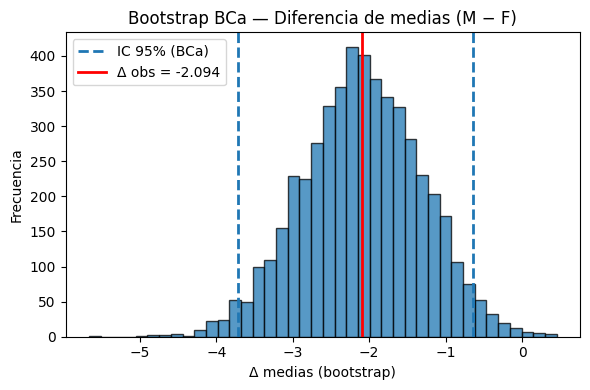

In [32]:
plt.figure(figsize=(6,4))
plt.hist(boot_mean, bins=40, edgecolor='k', alpha=0.75)
# Límites del IC (líneas punteadas)
plt.axvline(ci_bca_low,  linestyle='--', linewidth=2, label='IC 95% (BCa)')
plt.axvline(ci_bca_high, linestyle='--', linewidth=2)
# Valor observado (línea roja)
plt.axvline(diff_hat, color='red', linestyle='-', linewidth=2, label=f"Δ obs = {diff_hat:.3f}")
plt.title("Bootstrap BCa — Diferencia de medias (M − F)")
plt.xlabel("Δ medias (bootstrap)")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()


## Método Bootstrap-t (Studentized)

El Bootstrap-t utiliza el estadístico t (de Welch en este caso) calculado en cada remuestreo.
A partir de los percentiles de la distribución de t*, se construye un intervalo de confianza
para la diferencia de medias:

$$
IC_{1−α} = \hat{Δ} ± t^*_{(\alpha/2, 1−α/2)} \times SE_{\text{original}}
$$


In [33]:
# Bootstrap-t: distribución de t*
res_t = bootstrap(
    data=(x, y),
    statistic=welch_t,
    vectorized=False,
    paired=False,
    axis=0,
    n_resamples=B,
    method="percentile",
    random_state=43
)
t_star = res_t.bootstrap_distribution.ravel()

# Percentiles e intervalo reconstruido
tq_low, tq_high = np.quantile(t_star, [alpha/2, 1 - alpha/2])
ci_t_low  = diff_hat - tq_high * se_hat
ci_t_high = diff_hat - tq_low  * se_hat
p_boot_two_sided = float(np.mean(np.abs(t_star) >= abs(t_obs)))

print("Bootstrap-t — IC 95% para la diferencia de medias:")
print(f"[{ci_t_low:.4f}, {ci_t_high:.4f}]  (B={len(t_star)})")
print(f"p-bootstrap (bilateral) basado en |t*|: {p_boot_two_sided:.4f}")


Bootstrap-t — IC 95% para la diferencia de medias:
[-1.4368, 1.5304]  (B=5000)
p-bootstrap (bilateral) basado en |t*|: 0.5182


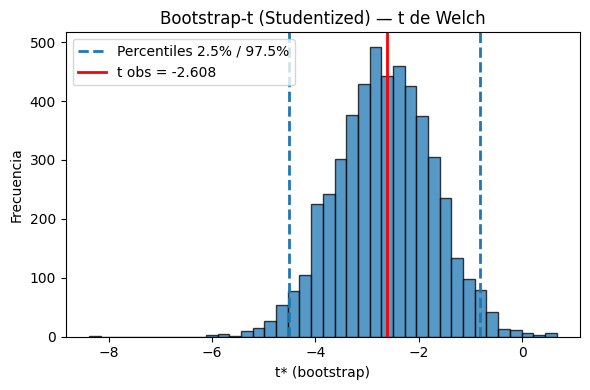

In [34]:
plt.figure(figsize=(6,4))
plt.hist(t_star, bins=40, edgecolor='k', alpha=0.75)
# Líneas punteadas en los percentiles
plt.axvline(tq_low,  linestyle='--', linewidth=2, label='Percentiles 2.5% / 97.5%')
plt.axvline(tq_high, linestyle='--', linewidth=2)
# Línea roja: t observado
plt.axvline(t_obs, color='red', linestyle='-', linewidth=2, label=f"t obs = {t_obs:.3f}")
plt.title("Bootstrap-t (Studentized) — t de Welch")
plt.xlabel("t* (bootstrap)")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()


# Bootstrap Paramétrico — Introducción teórica

## 1. Idea central
El **Bootstrap Paramétrico** es una extensión del método bootstrap que **asume una forma teórica de la distribución** de los datos (por ejemplo, Normal, Poisson, Exponencial, etc.).

En lugar de re-muestrear observaciones originales (como en el bootstrap clásico), el método:
1. Ajusta los **parámetros del modelo teórico** (media, desviación, etc.) usando la muestra observada.
2. **Genera nuevas muestras simuladas** a partir de esa distribución ajustada.
3. Calcula el estadístico de interés (media, diferencia de medias, correlación, etc.) en cada muestra simulada.
4. Construye la **distribución bootstrap del estadístico** para obtener intervalos de confianza (IC) o p-valores.

---

## 2. Cuándo usarlo
El bootstrap paramétrico se usa cuando:
- Se tiene una **razón teórica** para suponer una forma de distribución (por ejemplo, variables biológicas que son aproximadamente normales).
- El tamaño de muestra es pequeño y el bootstrap no paramétrico sería inestable.
- Se desea comparar resultados empíricos con un modelo teórico idealizado.

---

## 3. Ejemplo aplicado
Queremos estimar la **diferencia de medias** de la proteína IL-6 entre dos grupos (`M` y `F`),
asumiendo que los valores siguen una distribución **Normal** dentro de cada grupo.

Usaremos:
- `Δ = μ_M - μ_F` como estadístico de interés.
- Simularemos B = 5000 remuestreos paramétricos.
- Calcularemos un IC al 95% para Δ.


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer datos reales por grupo
x = df.loc[df["sex"] == "M", "IL6_pg_ml"].to_numpy()
y = df.loc[df["sex"] == "F", "IL6_pg_ml"].to_numpy()

# Estadísticos básicos
nx, ny = len(x), len(y)
mx, my = x.mean(), y.mean()
sx, sy = x.std(ddof=1), y.std(ddof=1)

print(f"Tamaño grupo M: {nx}, media={mx:.3f}, sd={sx:.3f}")
print(f"Tamaño grupo F: {ny}, media={my:.3f}, sd={sy:.3f}")

# Diferencia observada
delta_obs = mx - my
print(f"Diferencia observada Δ = {delta_obs:.3f}")


Tamaño grupo M: 27, media=4.173, sd=2.046
Tamaño grupo F: 23, media=6.267, sd=3.355
Diferencia observada Δ = -2.094


## Generación de remuestreos paramétricos

Cada réplica del bootstrap hará lo siguiente:

1. Simulará un nuevo grupo masculino desde una distribución Normal:
   $X^* \sim \mathcal{N}(\bar{x}, s_x^2)$

2. Simulará un nuevo grupo femenino:
   $ Y^* \sim \mathcal{N}(\bar{y}, s_y^2) $

3. Calculará la diferencia de medias:
   $ \Delta^* = \bar{X}^* - \bar{Y}^* $

Repetiremos esto **B = 5000 veces** para obtener una distribución empírica de Δ*, y construiremos un IC usando los percentiles 2.5% y 97.5%.


In [36]:
rng = np.random.default_rng(2025)
B = 5000
alpha = 0.05

# Almacena las diferencias simuladas
delta_star = np.empty(B)

for b in range(B):
    xb = rng.normal(loc=mx, scale=sx, size=nx)  # simula grupo M
    yb = rng.normal(loc=my, scale=sy, size=ny)  # simula grupo F
    delta_star[b] = xb.mean() - yb.mean()

# Intervalo de confianza percentil
ci_low, ci_high = np.quantile(delta_star, [alpha/2, 1 - alpha/2])

print(f"IC 95% (paramétrico, percentil) para Δ = μ_M - μ_F:")
print(f"[{ci_low:.4f}, {ci_high:.4f}]  (B={B})")


IC 95% (paramétrico, percentil) para Δ = μ_M - μ_F:
[-3.6154, -0.5027]  (B=5000)


## Interpretación del intervalo de confianza

- Si el intervalo **no incluye 0**, hay evidencia de una diferencia significativa entre grupos.
- Si el intervalo **incluye 0**, no hay evidencia suficiente para concluir diferencia.

**Importante:**  
El IC refleja la incertidumbre bajo el **modelo Normal** ajustado.  
Si los datos reales no son normales, este IC puede ser engañoso.


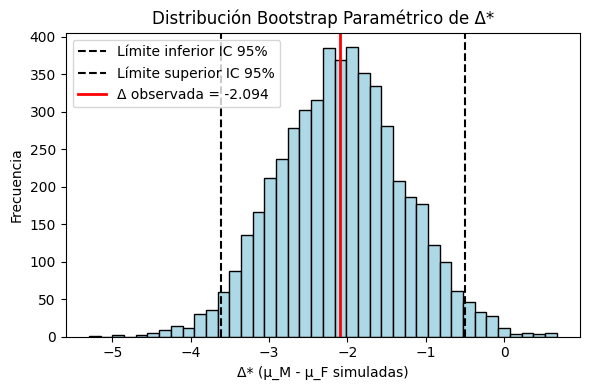

In [37]:
plt.figure(figsize=(6,4))
plt.hist(delta_star, bins=40, color="lightblue", edgecolor="k")
plt.axvline(ci_low, linestyle='--', color='black', label='Límite inferior IC 95%')
plt.axvline(ci_high, linestyle='--', color='black', label='Límite superior IC 95%')
plt.axvline(delta_obs, color='red', linewidth=2, label=f"Δ observada = {delta_obs:.3f}")
plt.title("Distribución Bootstrap Paramétrico de Δ*")
plt.xlabel("Δ* (μ_M - μ_F simuladas)")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()


## Extensión: Prueba de hipótesis bajo H₀

Si queremos calcular un **p-valor bootstrap**, debemos simular bajo la hipótesis nula:

> H₀: μ_M = μ_F

En ese caso:
- Igualamos las medias de ambos grupos a una media común (por ejemplo, la media global),
- Pero mantenemos las desviaciones estándar originales.

De esta forma, podemos construir una distribución de Δ* bajo H₀ y calcular la proporción de réplicas más extremas que la Δ observada.


In [38]:
# Media común bajo la hipótesis nula
mbar = (x.sum() + y.sum()) / (nx + ny)

# Simulación bajo H₀
delta_star_H0 = np.empty(B)

for b in range(B):
    xb = rng.normal(loc=mbar, scale=sx, size=nx)
    yb = rng.normal(loc=mbar, scale=sy, size=ny)
    delta_star_H0[b] = xb.mean() - yb.mean()

# p-valor bilateral: proporción de |Δ*| ≥ |Δ_obs|
p_boot = np.mean(np.abs(delta_star_H0) >= abs(delta_obs))

print(f"p-valor bootstrap paramétrico bilateral = {p_boot:.4f}")


p-valor bootstrap paramétrico bilateral = 0.0088


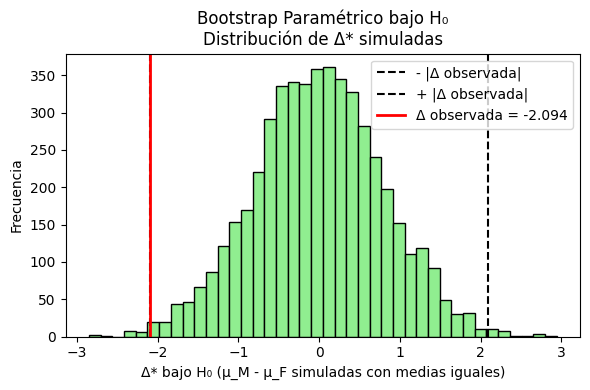

In [39]:
plt.figure(figsize=(6,4))
plt.hist(delta_star_H0, bins=40, color="lightgreen", edgecolor="k")
plt.axvline(-abs(delta_obs), linestyle='--', color='black', label='- |Δ observada|')
plt.axvline(+abs(delta_obs), linestyle='--', color='black', label='+ |Δ observada|')
plt.axvline(delta_obs, color='red', linewidth=2, label=f"Δ observada = {delta_obs:.3f}")
plt.title("Bootstrap Paramétrico bajo H₀\nDistribución de Δ* simuladas")
plt.xlabel("Δ* bajo H₀ (μ_M - μ_F simuladas con medias iguales)")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()


# Conclusión

El **Bootstrap Paramétrico**:
- Simula los datos desde una **distribución teórica ajustada**, no desde los datos observados.
- Es útil cuando se asume un modelo razonable (como Normalidad por grupo).
- Permite construir intervalos de confianza y calcular p-valores de forma flexible.

**Resumen práctico:**
- El IC (percentil) evalúa la incertidumbre bajo el modelo ajustado.
- El p-bootstrap evalúa la probabilidad de obtener una diferencia tan extrema como la observada si las medias fuesen iguales.

Si la distribución real no es Normal, o hay outliers marcados, se recomienda usar el **Bootstrap no paramétrico (BCa)**.


# Bootstrap por bloques 

## Idea
En datos con **fuentes de variación no experimentales** (p.ej., edad, duración de enfermedad, centro),
podemos **bloquear** esas fuentes y hacer un **bootstrap por bloques**:
re-muestrear **dentro de cada bloque** con reemplazo, manteniendo el tamaño de cada bloque,
y recomputar el estadístico de interés.

## ¿Por qué bloquear?
Bloquear reduce la variabilidad inducida por esas covariables, y hace que la comparación principal
(p.ej., el **efecto de sexo** sobre IL-6) sea más estable y con menos sesgo por confusión.

## Qué haremos
1. Cargar el CSV con columnas: `patient_id, age_years, sex, disease_stage, disease_duration_months, IL6_pg_ml, CRP_mg_L, TNFa_pg_ml`.
2. Definir un **bloque**:
   - Opción A: por **edad** (bins de edad).
   - Opción B: por **duración** (bins de meses de enfermedad).
3. Ejemplo A: **media global** de IL-6 con bootstrap por bloques (IC percentil).
4. Ejemplo B: **efecto de sexo** bloqueando por edad (o duración), estimado con OLS (`IL6 ~ C(sex) + C(bloque)`), con:
   - **IC percentil** para el coeficiente de `C(sex)[T.M]` (o `T.F`, según referencia)
   - **p-bootstrap** (dos colas) a partir de la distribución bootstrap del coeficiente.

## Selección de columnas y chequeos básicos

Trabajaremos con:
- Bloques basados en `age_years` **o** `disease_duration_months`.
- Variable de grupo `sex`.
- Variable respuesta `IL6_pg_ml`.

Verificamos valores faltantes y tipos.

In [42]:
cols_needed = ["patient_id","age_years","sex","disease_stage",
               "disease_duration_months","IL6_pg_ml","CRP_mg_L","TNFa_pg_ml"]
df = df[cols_needed].copy()

# Eliminamos filas con NA en las columnas clave que vamos a usar
df = df.dropna(subset=["age_years","sex","disease_duration_months","IL6_pg_ml"]).reset_index(drop=True)

# Aseguramos tipos
df["sex"] = df["sex"].astype(str)
print(df.dtypes)
print(df.describe(include="all"))

patient_id                  object
age_years                    int64
sex                         object
disease_stage               object
disease_duration_months      int64
IL6_pg_ml                  float64
CRP_mg_L                   float64
TNFa_pg_ml                 float64
dtype: object
       patient_id  age_years  sex disease_stage  disease_duration_months  \
count          50  50.000000   50            50                 50.00000   
unique         50        NaN    2             3                      NaN   
top          P001        NaN    M           III                      NaN   
freq            1        NaN   27            18                      NaN   
mean          NaN  53.860000  NaN           NaN                 23.14000   
std           NaN   9.519068  NaN           NaN                  6.35035   
min           NaN  29.000000  NaN           NaN                 11.00000   
25%           NaN  48.000000  NaN           NaN                 19.00000   
50%           NaN  56.